In [18]:
TRAIN_JSON = "../data/processed/train.json"
VAL_JSON   = "../data/processed/val.json"
TRAIN_IMG = "../"
IM_SIZE = 224

import json, random
from pathlib import Path
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def load_json(p): return json.load(open(p, "r"))

def to_norm(kps_px, W, H, size=224):
    k = np.array(kps_px, dtype=np.float32).reshape(-1,2)
    k[:,0] = k[:,0]*(size/W); k[:,1] = k[:,1]*(size/H)
    return (k/size)


In [9]:
train = load_json(TRAIN_JSON); val = load_json(VAL_JSON)
K = len(train[0]["keypoints"])//2 if len(train)>0 else 21
print(f"Train: {len(train)}  Val: {len(val)}  Keypoints: {K}")
print("Example:", train[0] if train else "—")

Train: 29304  Val: 3256  Keypoints: 21
Example: {'image_path': 'data/raw/rgb/00028670.jpg', 'keypoints': [70.85649871826172, 133.6610870361328, 88.85858154296875, 142.48666381835938, 96.8179702758789, 144.45462036132812, 102.92792510986328, 142.3721923828125, 108.7085189819336, 139.8459930419922, 115.43814849853516, 121.43316650390625, 129.81317138671875, 112.38004302978516, 140.04751586914062, 104.85804748535156, 148.16732788085938, 95.52375793457031, 119.44294738769531, 113.46714782714844, 137.47401428222656, 114.78716278076172, 151.254150390625, 117.45954132080078, 167.0193328857422, 113.96165466308594, 115.51280212402344, 106.70232391357422, 131.54104614257812, 99.47328186035156, 145.00717163085938, 93.95059967041016, 156.77842712402344, 85.33702087402344, 110.81404876708984, 103.468994140625, 119.30274963378906, 93.81354522705078, 126.7393569946289, 85.43421936035156, 136.248291015625, 77.66459655761719], 'source': 'FreiHAND'}


In [15]:
def count_missing(items, base):
    miss = 0
    for it in items:
        p = Path("../"+it["image_path"])
        if not p.is_absolute(): p = (Path(base)/p).resolve()
        if not p.exists(): miss += 1
    return miss

base_tr = Path(TRAIN_JSON).parent; base_val = Path(VAL_JSON).parent
print("Missing train:", count_missing(train, base_tr))
print("Missing val  :", count_missing(val, base_val))

Missing train: 29304
Missing val  : 3256


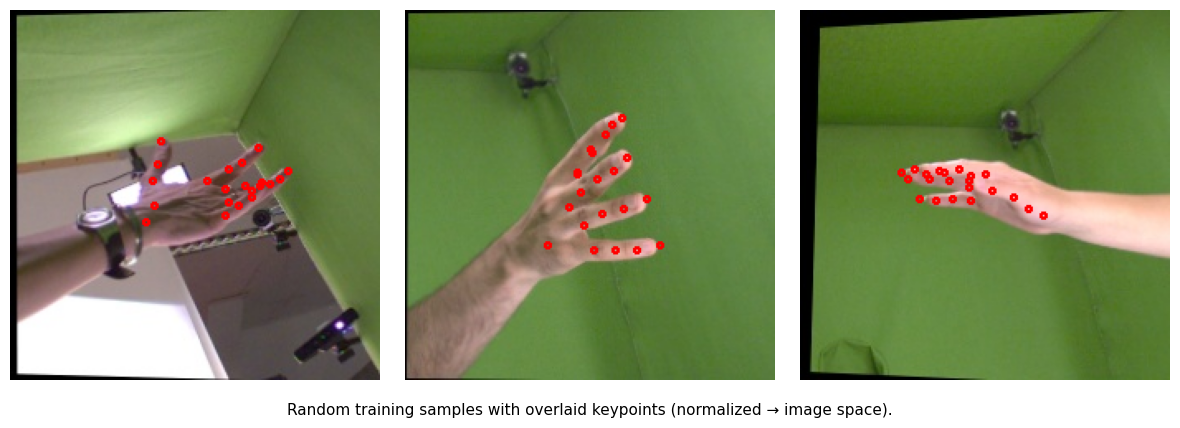

In [31]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
import random

def show_item(ax, it, base, r=2):
    """
    Draws keypoints on a single image and displays it on the given axis.
    """
    p = Path(it["image_path"])
    if not p.is_absolute():
        p = (Path(base) / p).resolve()

    img = Image.open(p).convert("RGB")
    W, H = img.size

    kps_n = to_norm(it["keypoints"], W, H, IM_SIZE)
    draw = ImageDraw.Draw(img)
    for x, y in np.stack([kps_n[:, 0] * W, kps_n[:, 1] * H], axis=1):
        draw.ellipse((x - r, y - r, x + r, y + r), outline=(255, 0, 0), width=2)

    ax.imshow(img)
    ax.axis("off")

# Number of samples to visualize
N = 3
idxs = random.sample(range(len(train)), N)

# Create figure and axes
fig, axes = plt.subplots(1, N, figsize=(N * 4, 4))
if N == 1:
    axes = [axes]

for ax, idx in zip(axes, idxs):
    show_item(ax, train[idx], TRAIN_IMG)

# Add caption under the figure
fig.text(
    0.5, -0.05,
    "Random training samples with overlaid keypoints (normalized → image space).",
    ha="center",
    fontsize=11
)

plt.tight_layout()
plt.show()